# ANCOVA for pre/post treatment nonequivalent group designs

<div class="alert alert-warning">

Warning

This is a preliminary example based on synthetic data. It will hopefully soon be updated with data from a real study.

</div>

In [8]:
import causalpy as cp

In [9]:
%load_ext autoreload
%autoreload 2
# %config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate synthetic data

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

N = 200


pre_treatment_means = np.array([10, 12])
treatment_effect = 2

group = np.random.choice(2, size=N)
pre = np.random.normal(loc=pre_treatment_means[group])
post = pre + treatment_effect * group + np.random.normal(size=N) * 0.4
df = pd.DataFrame({"group": group, "pre": pre, "post": post})
df.head()

,group,pre,post
0,1,11.425468,12.951244
1,1,10.895747,12.470369
2,1,10.915603,13.260134
3,1,11.998910,14.091871
4,0,11.782702,11.088902


/Users/benjamv/opt/mambaforge/envs/CausalPy/lib/python3.10/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)


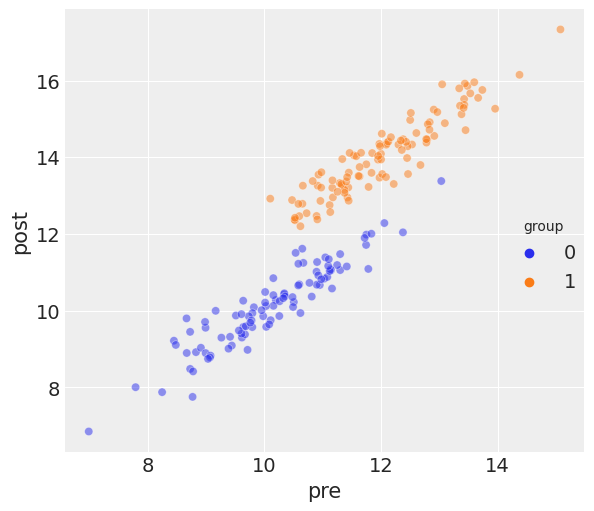

In [12]:
sns.relplot(x="pre", y="post", hue="group", alpha=0.5, data=df)

## Run the analysis

In [16]:
result = cp.pymc_experiments.PrePostNEGD(
    df,
    formula="post ~ 1 + C(group) + pre",
    group_variable_name="group",
    prediction_model=cp.pymc_models.LinearRegression(),
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]


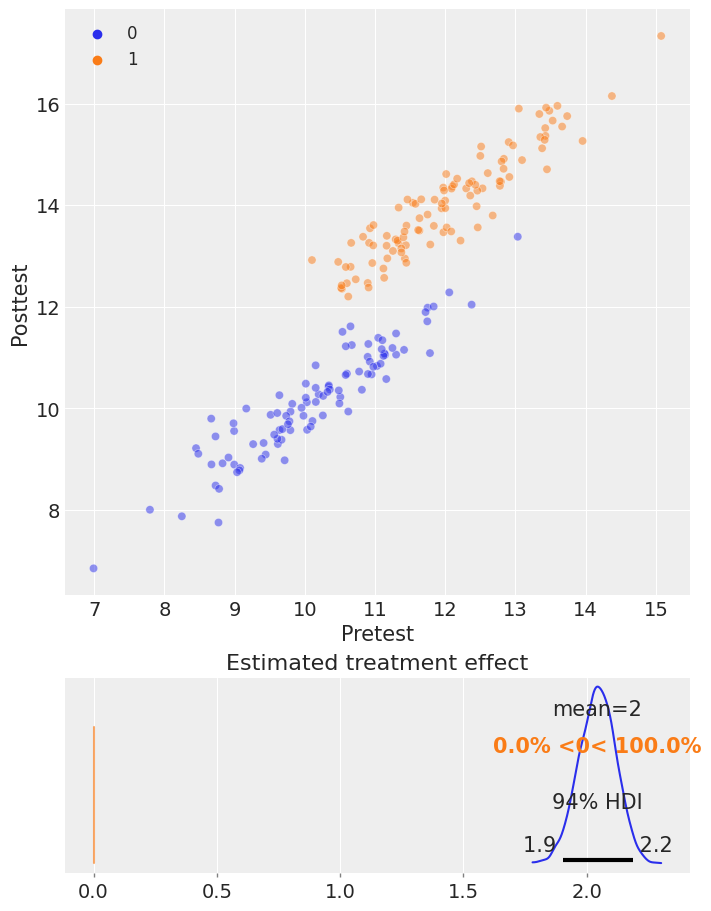

In [17]:
fig, ax = result.plot()

In [18]:
result.summary()

==================Pretest/posttest Nonequivalent Group Design===================
Formula: post ~ 1 + C(group) + pre

Results:
Causal impact = 2.04, $CI_{94\%}$[1.90, 2.18]
Model coefficients:

                Intercept                     0.38,
                94% HDI [-0.15,
                0.88]
                

                C(group)[T.1]                 2.04,
                94% HDI [1.90,
                2.18]
                

                pre                           0.96,
                94% HDI [0.92,
                1.02]
                

            sigma                         0.39,
            94% HDI [0.36,
            0.43]
            
